In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import sys
from pathlib import Path
import os

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.metrics import accuracy_score

# import custom functions from src folder
module_path = str(Path.cwd() / "../../src")

if module_path not in sys.path:
    sys.path.append(module_path)

from util import *

In [2]:
color = ["#e41a1c", "#377eb8"]

In [3]:
#Data constants

shapes_B = [2, 4]#[2, 2]
scales_B = [3, 3]
k_B = len(scales_B) # Number of classes
d_B = 2 # Number of dimensions
p_c_B = [1/len(shapes_B)]*len(shapes_B) # Uniform distributon over classes
tag_B = f'k_{k_B}_d{d_B}_shapes{shapes_B}_scales{scales_B}_pc{p_c_B}'.replace(" ", "")

trainfile_B = f"train_n_50000_{tag_B}"
testfile_B = f"test_n_10000_{tag_B}"
gridfile_B = f"grid_x1_x2_10000_{tag_B}"
test_data_B = pd.read_csv(f"data/{testfile_B}.csv")
grid_data_B = pd.read_csv(f"data/{gridfile_B}.csv")
train_data_B = pd.read_csv(f"data/{trainfile_B}.csv")
grid_rmax_B = grid_data_B["x1"].max()

shapes_A = [2, 6]#[2, 2]
scales_A = [5, 3]
k_A = len(scales_A) # Number of classes
d_A = 2 # Number of dimensions
p_c_A = [1/len(shapes_A)]*len(shapes_A) # Uniform distributon over classes
tag_A = f'k_{k_A}_d{d_A}_shapes{shapes_A}_scales{scales_A}_pc{p_c_A}'.replace(" ", "")

trainfile_A = f"train_n_50000_{tag_A}"
testfile_A = f"test_n_10000_{tag_A}"
gridfile_A = f"grid_x1_x2_10000_{tag_A}"
test_data_A = pd.read_csv(f"data/{testfile_A}.csv")
grid_data_A = pd.read_csv(f"data/{gridfile_A}.csv")
train_data_A = pd.read_csv(f"data/{trainfile_A}.csv")
grid_rmax_A = grid_data_A["x1"].max()

# Same for both data sets
n_train = [250, 500, 1000, 2000, 3000, 5000]
n_plots = len(n_train)

max_err_val = [0]*n_plots
for i in range(n_plots):
    if n_train[i] < 1000:
        max_err_val[i] = 0.3
    else:
        max_err_val[i] = 0.3


### Dataset A

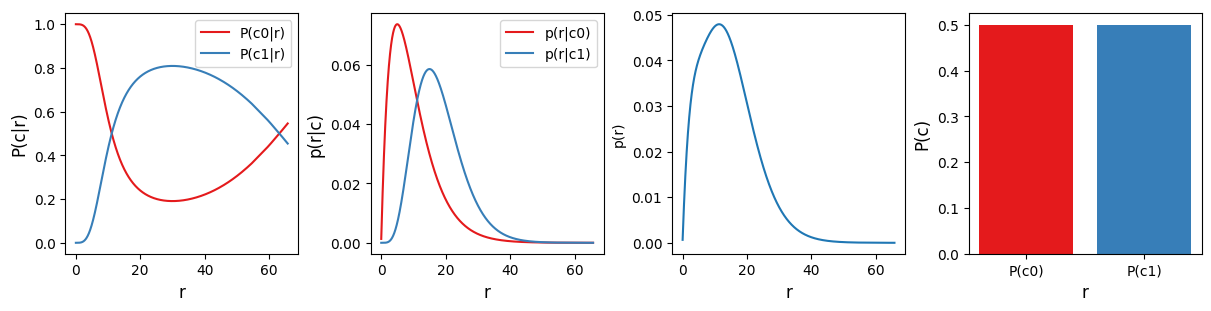

In [4]:
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (12, 3), layout="constrained")
for i in range(k_A):
    sn.lineplot(train_data_A, x="r", y=f"p_c{i}_given_r", label=f"P(c{i}|r)", ax=axs[0], c=color[i])
    axs[0].set_ylabel(r"P(c|r)", fontsize=12)
    axs[0].legend(loc="upper right")
    sn.lineplot(train_data_A, x="r", y=f"p_r_given_c{i}", label=f"p(r|c{i})", ax=axs[1], c=color[i])
    axs[1].set_ylabel(r"p(r|c)", fontsize=12)
    axs[1].legend(loc="upper right")
    axs[3].bar(x=[f"P(c{i})" for i in range(k_A)], height=p_c_A, color=color)
    axs[3].set_ylabel(f"P(c)", fontsize=12)

sn.lineplot(train_data_A, x="r", y="p_r", ax=axs[2])
axs[2].set_ylabel("p(r)")
for ax in axs:
    ax.set_xlabel("r", fontsize=12)
    #ax.set_xlim(0, 30)
fig.savefig(f"fig/data_{tag_A}.pdf", format="pdf", bbox_inches='tight', dpi=350)

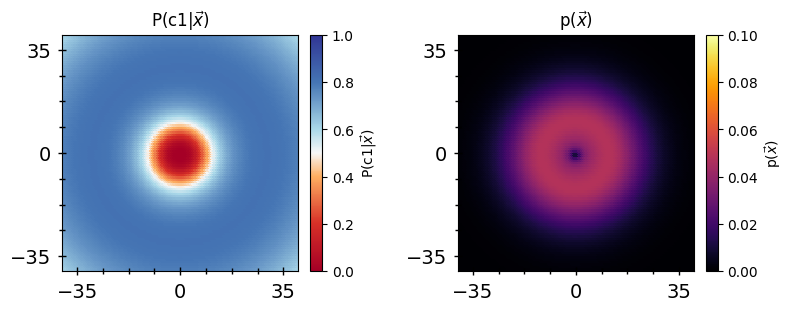

In [5]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (8,3), layout="constrained")
axs[0] = plot_results(grid_data_A, "p_c1_given_r", axs[0], r"P(c1|$\vec{x}$)", grid=True, rmax=grid_rmax_A)
hue_norm = mpl.colors.Normalize(vmin=0, vmax=1, clip=False)
fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm, cmap=red_blue_cmap()), fraction=0.050, pad=0.04, label=r"P(c1|$\vec{x}$)", ax=axs[0])

axs[1] = plot_std(grid_data_A, "p_r", axs[1], r"p($\vec{x}$)", grid=True, max_val = 0.1, rmax=grid_rmax_A)
hue_norm = mpl.colors.Normalize(vmin=0, vmax=0.1, clip=False)
fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm, cmap="inferno"), fraction=0.050, pad=0.04, label=r"p($\vec{x}$)", ax=axs[1])

#fig.savefig(f"../fig/DNN_ensemble_ntrain_{n_data[i]}.pdf", format="pdf", bbox_inches='tight', dpi=350)

### Data set B

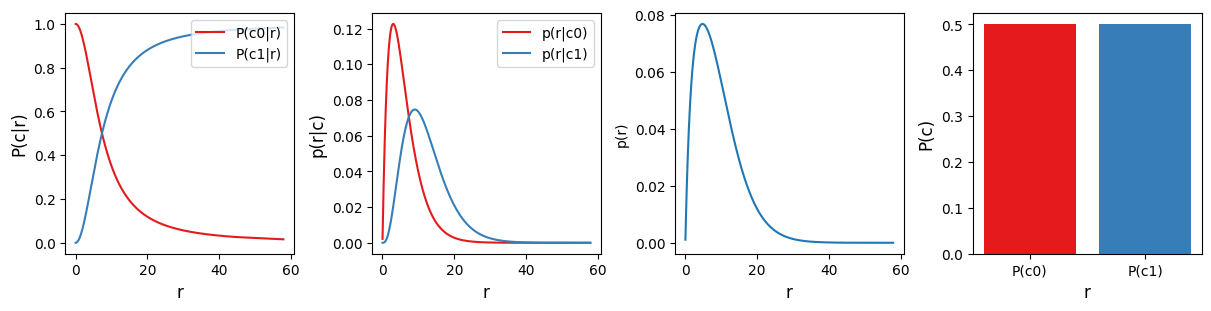

In [6]:
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (12, 3), layout="constrained")
for i in range(k_B):
    sn.lineplot(train_data_B, x="r", y=f"p_c{i}_given_r", label=f"P(c{i}|r)", ax=axs[0], c=color[i])
    axs[0].set_ylabel(r"P(c|r)", fontsize=12)
    axs[0].legend(loc="upper right")
    sn.lineplot(train_data_B, x="r", y=f"p_r_given_c{i}", label=f"p(r|c{i})", ax=axs[1], c=color[i])
    axs[1].set_ylabel(r"p(r|c)", fontsize=12)
    axs[1].legend(loc="upper right")
    axs[3].bar(x=[f"P(c{i})" for i in range(k_B)], height=p_c_B, color=color)
    axs[3].set_ylabel(f"P(c)", fontsize=12)

sn.lineplot(train_data_B, x="r", y="p_r", ax=axs[2])
axs[2].set_ylabel("p(r)")
for ax in axs:
    ax.set_xlabel("r", fontsize=12)
    #ax.set_xlim(0, 30)
fig.savefig(f"fig/data_{tag_B}.pdf", format="pdf", bbox_inches='tight', dpi=350)

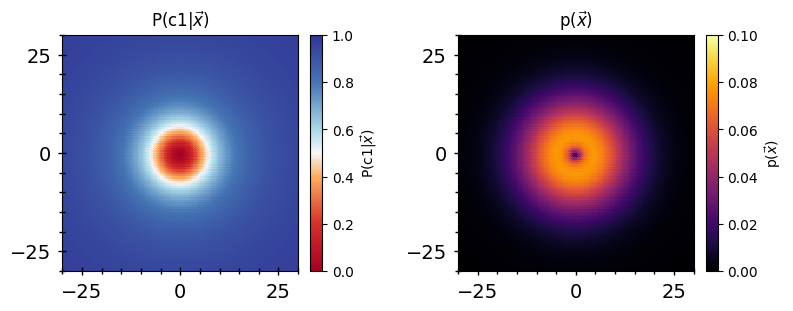

In [7]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (8,3), layout="constrained")
axs[0] = plot_results(grid_data_B, "p_c1_given_r", axs[0], r"P(c1|$\vec{x}$)", grid=True, rmax=grid_rmax_B)
hue_norm = mpl.colors.Normalize(vmin=0, vmax=1, clip=False)
fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm, cmap=red_blue_cmap()), fraction=0.050, pad=0.04, label=r"P(c1|$\vec{x}$)", ax=axs[0])

axs[1] = plot_std(grid_data_B, "p_r", axs[1], r"p($\vec{x}$)", grid=True, max_val = 0.1, rmax=grid_rmax_B)
hue_norm = mpl.colors.Normalize(vmin=0, vmax=0.1, clip=False)
fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm, cmap="inferno"), fraction=0.050, pad=0.04, label=r"p($\vec{x}$)", ax=axs[1])

#fig.savefig(f"../fig/DNN_ensemble_ntrain_{n_data[i]}.pdf", format="pdf", bbox_inches='tight', dpi=350)

In [8]:
# Expected accuracy on any test set sampled from this distribution
exp_acc = np.sum(test_data_B[[f"p_c{i}_given_r" for i in range(k_B)]].max(axis=1))/len(test_data_B)
# But in our case, we will see the actual accuracy on this test set compared to expectation
test_data_B["Expected class"] = np.array(test_data_B[[f"p_c{i}_given_r" for i in range(k_B)]]).argmax(axis=-1)
max_acc = accuracy_score(test_data_B["class"], test_data_B["Expected class"], normalize=True)

print("Expected accuray: ", exp_acc, "Max optimal accuracy test set: ", max_acc)

Expected accuray:  0.7347306433676738 Max optimal accuracy test set:  0.7367


### Get results

In [9]:

model_names = ["NNE", 
               "CL",
               "EDL",
               "MCD", 
               #"BNN", 
               "GP", 
               "DPMM"]
pred_keys = ["Prediction_ensemble", 
             "Prediction_ensemble",
             "Prediction", 
             "Prediction_MC", 
             #"Prediction",
             "Prediction", 
             "Inferred_class"]
prob_keys = ["Confidence_avg", 
             "Confidence_avg", 
             "Est_prob_blue", 
             "Confidence_MC", 
             #"Est_prob_blue", 
             "Est_prob_blue_MC", 
             "Est_prob_blue"]
std_keys = ["Confidence_std", 
            "Confidence_std",
            "Std_prob_blue",
            "Std_MC", 
            #"Std_prob_blue", 
            "Std_prob_blue_MC", 
            "Std_samples_blue"]

bnn_lr_list = [0.028, 0.028, 0.05, 0.05, 0.05, 0.05]#[0.028, 0.028, 0.05, 0.05, 0.05, 0.05, 0.05]

n_models = len(model_names)


gridfiles_A = [
    [f"DNN/predictions/train_n_50000_{tag_A}/ensemble/grid_{tag_A}_SequentialNet_10ensembles_ndata-{n}.csv" for n in n_train],
    [f"DNN/predictions/train_n_50000_{tag_A}/CL/grid_{tag_A}_SequentialNet_CL_10ensembles_ndata-{n}.csv" for n in n_train],
    [f"DNN/predictions/train_n_50000_{tag_A}/evidential/grid_{tag_A}_SequentialNet_evidential_best_ndata-{n}.csv" for n in n_train],
    [f"DNN/predictions/train_n_50000_{tag_A}/MCD/grid_{tag_A}_SequentialNet_small_MCD_pd0.3_nMC_200_Vndata_best-{n}.csv" for n in n_train],
    #[f"BNN/predictions/{trainfile}/grid_{tag}_predicted_BNN_lr{lr}_sp0.1_ndata-{n}.csv" for (lr, n) in zip(bnn_lr_list, n_train)],
    [f"gaussian_process/predictions/train_n_50000_{tag_A}/grid_{tag_A}_predicted_latentGP_1_ls10_ndata-{n}.csv" for n in n_train],
    [f"inferno/predictions/train_n_50000_{tag_A}/grid_{tag_A}_predicted_MM_ndata-{n}.csv" for n in n_train]
]

testfiles_A = [
    [f"DNN/predictions/train_n_50000_{tag_A}/ensemble/test_n_10000_{tag_A}_SequentialNet_10ensembles_ndata-{n}.csv" for n in n_train],
    [f"DNN/predictions/train_n_50000_{tag_A}/CL/test_n_10000_{tag_A}_SequentialNet_CL_10ensembles_ndata-{n}.csv" for n in n_train],
    [f"DNN/predictions/train_n_50000_{tag_A}/evidential/test_n_10000_{tag_A}_SequentialNet_evidential_best_ndata-{n}.csv" for n in n_train],
    [f"DNN/predictions/train_n_50000_{tag_A}/MCD/test_n_10000_{tag_A}_SequentialNet_small_MCD_pd0.3_nMC_200_Vndata_best-{n}.csv" for n in n_train],
    #[f"BNN/predictions/{trainfile}/{testfile}_predicted_BNN_lr{lr}_sp0.1_ndata-{n}.csv" for (lr, n) in zip(bnn_lr_list, n_train)],
    [f"gaussian_process/predictions/train_n_50000_{tag_A}/test_n_10000_{tag_A}_predicted_latentGP_1_ls10_ndata-{n}.csv" for n in n_train],
    [f"inferno/predictions/train_n_50000_{tag_A}/test_n_10000_{tag_A}_predicted_MM_ndata-{n}.csv" for n in n_train]
]

grid_dfs_A = [[pd.read_csv(gridfiles_A[i][j]) for j in range(n_plots)]for i in range(n_models)]
test_dfs_A = [[pd.read_csv(testfiles_A[i][j]) for j in range(n_plots)]for i in range(n_models)]


gridfiles_B = [
    [f"DNN/predictions/{trainfile_B}/ensemble/grid_{tag_B}_SequentialNet_10ensembles_ndata-{n}.csv" for n in n_train],
    [f"DNN/predictions/{trainfile_B}/CL/grid_{tag_B}_SequentialNet_CL_10ensembles_ndata-{n}.csv" for n in n_train],
    [f"DNN/predictions/{trainfile_B}/evidential/grid_{tag_B}_SequentialNet_evidential_best_ndata-{n}.csv" for n in n_train],
    [f"DNN/predictions/{trainfile_B}/MCD/grid_{tag_B}_SequentialNet_small_MCD_pd0.3_nMC_200_Vndata_best-{n}.csv" for n in n_train],
    #[f"BNN/predictions/{trainfile}/grid_{tag}_predicted_BNN_lr{lr}_sp0.1_ndata-{n}.csv" for (lr, n) in zip(bnn_lr_list, n_train)],
    [f"gaussian_process/predictions/{trainfile_B}/grid_{tag_B}_predicted_latentGP_1_ls10_ndata-{n}.csv" for n in n_train],
    [f"inferno/predictions/{trainfile_B}/grid_{tag_B}_predicted_MM_ndata-{n}.csv" for n in n_train]
]

testfiles_B = [
    [f"DNN/predictions/{trainfile_B}/ensemble/{testfile_B}_SequentialNet_10ensembles_ndata-{n}.csv" for n in n_train],
    [f"DNN/predictions/{trainfile_B}/CL/{testfile_B}_SequentialNet_CL_10ensembles_ndata-{n}.csv" for n in n_train],
    [f"DNN/predictions/{trainfile_B}/evidential/{testfile_B}_SequentialNet_evidential_best_ndata-{n}.csv" for n in n_train],
    [f"DNN/predictions/{trainfile_B}/MCD/{testfile_B}_SequentialNet_small_MCD_pd0.3_nMC_200_Vndata_best-{n}.csv" for n in n_train],
    #[f"BNN/predictions/{trainfile}/{testfile}_predicted_BNN_lr{lr}_sp0.1_ndata-{n}.csv" for (lr, n) in zip(bnn_lr_list, n_train)],
    [f"gaussian_process/predictions/{trainfile_B}/{testfile_B}_predicted_latentGP_1_ls10_ndata-{n}.csv" for n in n_train],
    [f"inferno/predictions/{trainfile_B}/{testfile_B}_predicted_MM_ndata-{n}.csv" for n in n_train]
]

grid_dfs_B = [[pd.read_csv(gridfiles_B[i][j]) for j in range(n_plots)]for i in range(n_models)]
test_dfs_B = [[pd.read_csv(testfiles_B[i][j]) for j in range(n_plots)]for i in range(n_models)]



### Metrics

In [10]:

scores_A = [calculate_metrics(test_dfs_A[i], grid_dfs_A[i], n_train, grid_data_A, test_data_A, 
                           pred_keys[i], prob_keys[i], std_keys[i]) for i in range(n_models)]


scores_B = [calculate_metrics(test_dfs_B[i], grid_dfs_B[i], n_train, grid_data_B, test_data_B, 
                           pred_keys[i], prob_keys[i], std_keys[i]) for i in range(n_models)]

scores_A_small = [calculate_metrics(test_dfs_A[i], grid_dfs_A[i], n_train, grid_data_A, test_data_A, 
                           pred_keys[i], prob_keys[i], std_keys[i], n_max=500) for i in range(n_models)]

scores_B_small = [calculate_metrics(test_dfs_B[i], grid_dfs_B[i], n_train, grid_data_B, test_data_B, 
                           pred_keys[i], prob_keys[i], std_keys[i], n_max=500) for i in range(n_models)]

#Calculate best score
keys = ["N data", "ACC", "ROCAUC", "LogLoss", "Mean KL-div test", "ECE", "WD test"]
best_score_A = pd.DataFrame(columns=keys)
best_score_A["N data"] = n_train

for i in range(n_plots):
    #Metrics that should be maximized
    for key in (["ACC", "ROCAUC"]):
        best_score_A.loc[i, key] = np.argmax([scores_A[j][key][i] for j in range(n_models)])
    for key in (["LogLoss", "Mean KL-div test", "ECE", "WD test"]):
        best_score_A.loc[i, key] = np.argmin([scores_A[j][key][i] for j in range(n_models)])


best_score_B = pd.DataFrame(columns=keys)
best_score_B["N data"] = n_train

for i in range(n_plots):
    #Metrics that should be maximized
    for key in (["ACC", "ROCAUC"]):
        best_score_B.loc[i, key] = np.argmax([scores_B[j][key][i] for j in range(n_models)])
    for key in (["LogLoss", "Mean KL-div test", "ECE", "WD test"]):
        best_score_B.loc[i, key] = np.argmin([scores_B[j][key][i] for j in range(n_models)])


best_score_A_small = pd.DataFrame(columns=keys)
best_score_A_small["N data"] = n_train

for i in range(n_plots):
    #Metrics that should be maximized
    for key in (["ACC", "ROCAUC"]):
        best_score_A_small.loc[i, key] = np.argmax([scores_A_small[j][key][i] for j in range(n_models)])
    for key in (["LogLoss", "Mean KL-div test", "ECE", "WD test"]):
        best_score_A_small.loc[i, key] = np.argmin([scores_A_small[j][key][i] for j in range(n_models)])


best_score_B_small = pd.DataFrame(columns=keys)
best_score_B_small["N data"] = n_train

for i in range(n_plots):
    #Metrics that should be maximized
    for key in (["ACC", "ROCAUC"]):
        best_score_B_small.loc[i, key] = np.argmax([scores_B_small[j][key][i] for j in range(n_models)])
    for key in (["LogLoss", "Mean KL-div test", "ECE", "WD test"]):
        best_score_B_small.loc[i, key] = np.argmin([scores_B_small[j][key][i] for j in range(n_models)])

In [12]:
def grid_plots(grid_dfs, grid_data, grid_rmax, dataset_name:str):
    # A horrible function which uses global variables because I am too lazy

    for i in range(n_plots):
        fig, axs = plt.subplots(nrows = 3, ncols = n_models, figsize = (1.8*n_models,1.7*3), layout="constrained", sharey=True, sharex=True)
        for j in range(n_models):
            axs[0][j] = plot_results(grid_dfs[j][i], prob_keys[j], axs[0][j], "", grid=True, rmax=grid_rmax)
            axs[1][j] = plot_diff(grid_dfs[j][i], grid_data, prob_keys[j], "p_c1_given_r",  axs[1][j], r"", max_val=max_err_val[-1], rmax=grid_rmax, absolute=True)
            axs[2][j] = plot_std(grid_dfs[j][i], std_keys[j], axs[2][j], r"", grid=True, max_val=max_err_val[-1], rmax=grid_rmax)
            axs[0][j].set_title(model_names[j])

        for ax in axs.flatten():
            ax.tick_params(labelsize=10, bottom=True, left=True, top=False, right=False)
        hue_norm_prob = mpl.colors.Normalize(vmin=0, vmax=1, clip=False)
        fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm_prob, cmap="inferno"),  fraction=0.050, pad=0.04,
                    label=r"$\bar{Q}$(blue|$\vec{x}$)", ax=axs[0][-1])
        
        hue_norm_std = mpl.colors.Normalize(vmin=0, vmax=max_err_val[-1], clip=False)
        fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm_std, cmap="inferno"),  fraction=0.050, pad=0.04,
                    label=r"$\bar{Q}$(blue|$\vec{x}$)-P(blue|$\vec{x}$)", ax=axs[1][-1])
        
        hue_norm_err = mpl.colors.Normalize(vmin=0, vmax=max_err_val[-1], clip=False)
        fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm_err, cmap="inferno"),  fraction=0.050, pad=0.04,
                    label=r"$\sigma$(Q$_i$(blue|$\vec{x}$))", ax=axs[2][-1])
        
        fig.savefig(f"fig/results_{dataset_name}_grid_{n_train[i]}.pdf", format="pdf", bbox_inches='tight', dpi=350)


In [13]:
#grid_plots(grid_dfs_A, grid_data_A, grid_rmax_A, "datasetA")

In [14]:
#grid_plots(grid_dfs_B, grid_data_B, grid_rmax_B, "datasetB")

In [18]:
def r_plots(grid_dfs, grid_data, grid_rmax, color_palette, dataset_name:str):
    # A horrible function which uses global variables because I am too lazy

    for i in range(n_plots):
        fig, axs = plt.subplots(nrows = 3, ncols = n_models, figsize = (2*n_models,5), layout="constrained", sharex=True, sharey="row")
        hue_norm_prob = mpl.colors.Normalize(vmin=0, vmax=2*np.pi, clip=False)
        for j in range(n_models):
            sn.scatterplot(grid_dfs[j][i], x="r", y=f"{prob_keys[j]}", s=5, ax = axs[0][j], hue="a1", 
                    hue_norm = hue_norm_prob, palette=color_palette,
                    legend=False, linewidth=0)
            #sn.lineplot(truth_data, x="r_x", y="P_blue_given_x", linewidth=2, ax = axs[0], label="Generating function", color="#67001f")
            sn.lineplot(grid_data, x="r", y="p_c1_given_r", ax = axs[0][j], c="#67001f", linewidth=1, label=r"P(c|$\vec{x}$)")
            axs[0][j].set_ylabel(r"$\bar{Q}$(c|$\vec{x}$)", fontsize=12)
            axs[0][j].set_ylim(-0.1, 1.1)

            
            grid_dfs[j][i]["Error"] = grid_dfs[j][i][f"{prob_keys[j]}"] - grid_data["p_c1_given_r"]
            sn.scatterplot(grid_dfs[j][i], x="r", y=f"Error", s=5, ax = axs[1][j], hue="a1", 
                    hue_norm = hue_norm_prob, palette=color_palette,
                    legend=False, linewidth=0)
            axs[1][j].set_ylabel(r"|$\bar{Q}$(c|$\vec{x}$)-P(c|$\vec{x}$)|", fontsize=12)
            axs[1][j].set_ylim(-max_err_val[i], max_err_val[i])

            sn.scatterplot(grid_dfs[j][i], x="r", y=f"{std_keys[j]}", s=5, ax = axs[2][j], hue="a1", 
                    hue_norm = hue_norm_prob, palette=color_palette, #hsv
                    legend=False, linewidth=0)
            axs[2][j].set_ylabel(r"$\sigma$(Q$_i$(c|$\vec{x}$))", fontsize=12)
            axs[2][j].set_ylim(0, max_err_val[i])

            axs[0][j].set_title(model_names[j], fontsize=14)
        axs[0][0].legend(loc="lower right")
        fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm_prob, cmap=color_palette),  fraction=0.050, pad=0.04,
                    label=r"$\theta_x$", ax=axs[0][-1])
        fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm_prob, cmap=color_palette),  fraction=0.050, pad=0.04,
                    label=r"$\theta_x$", ax=axs[1][-1])
        fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm_prob, cmap=color_palette),  fraction=0.050, pad=0.04,
                    label=r"$\theta_x$", ax=axs[2][-1])
        axs[0][0].set_xlabel(r"$r_x$")

        #fig.savefig(f"fig/results_{dataset_name}_r_axis_{n_train[i]}.pdf", format="pdf", bbox_inches='tight', dpi=350)


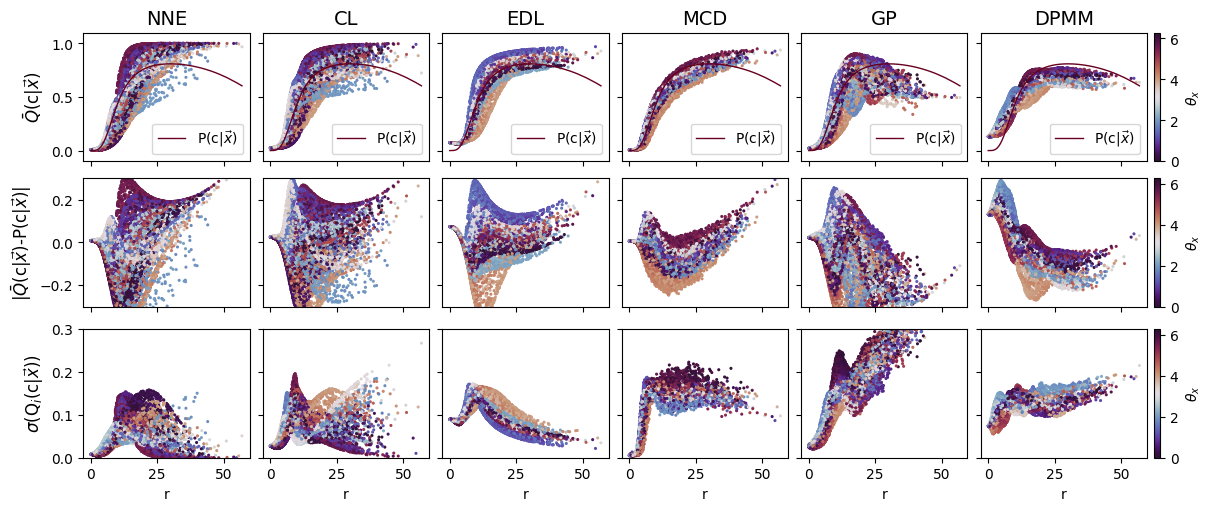

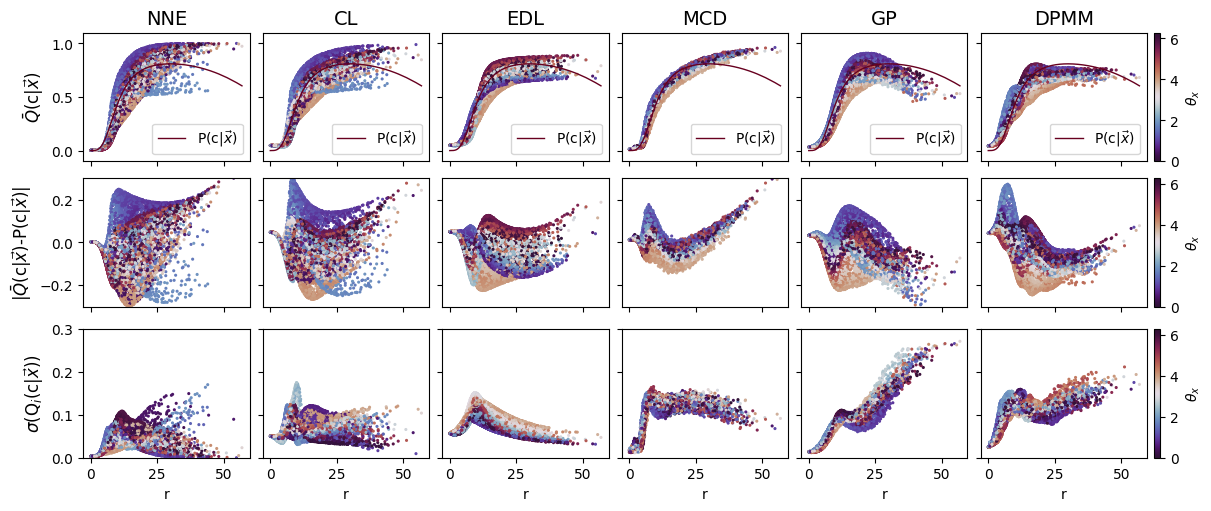

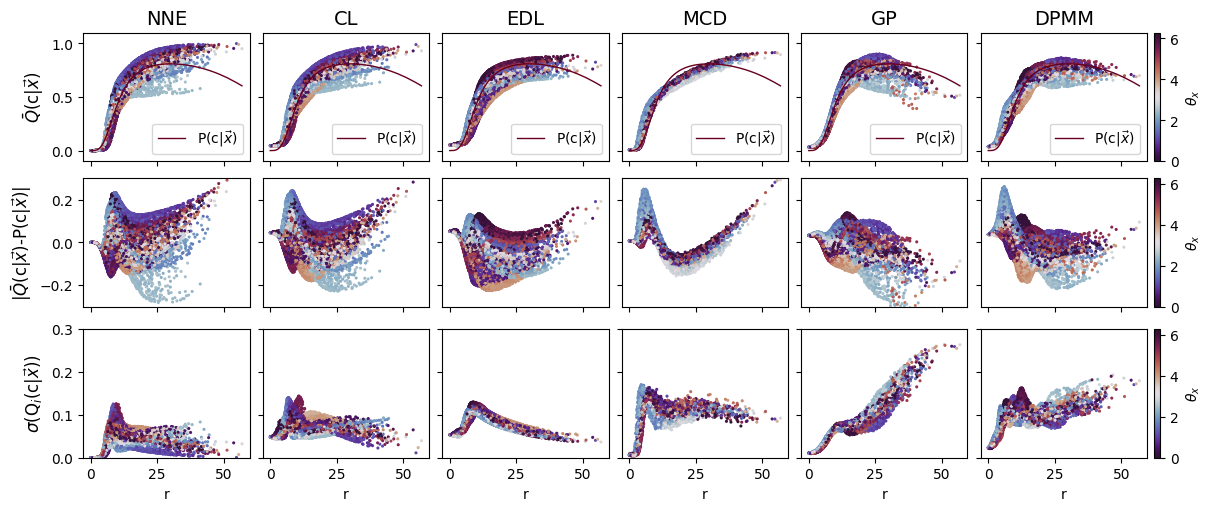

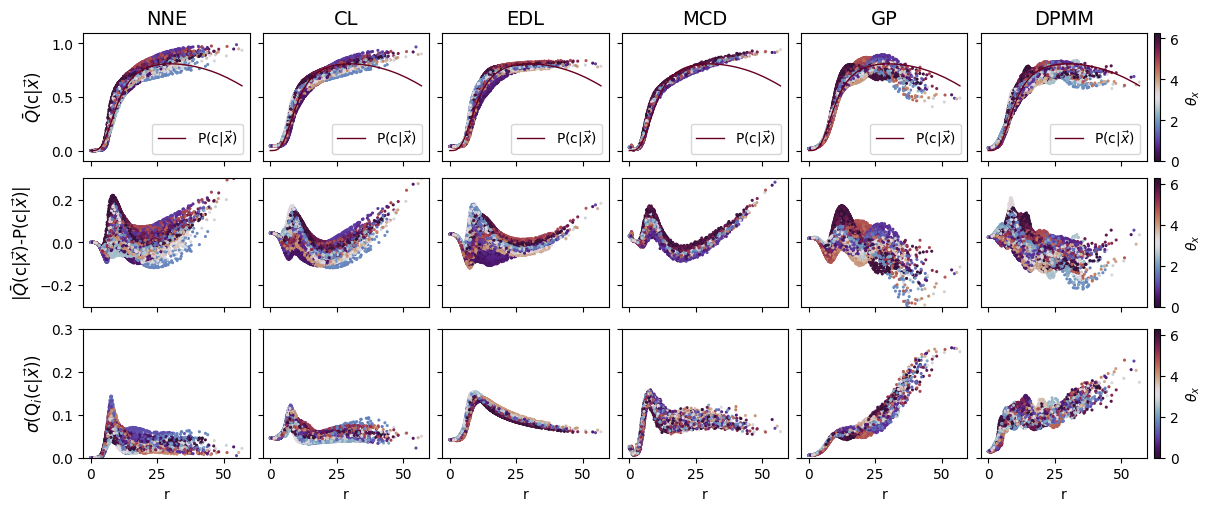

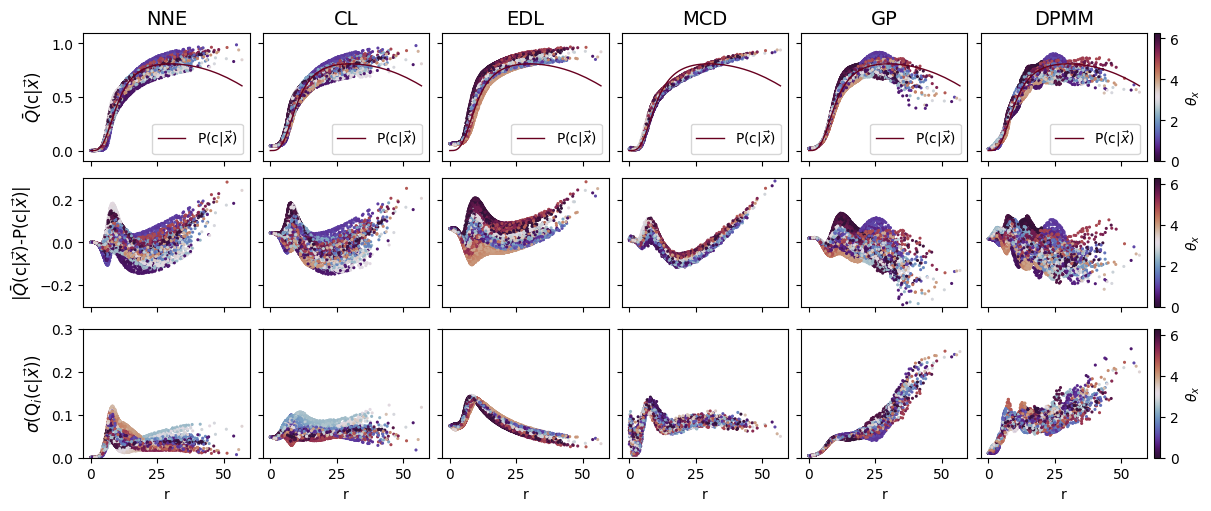

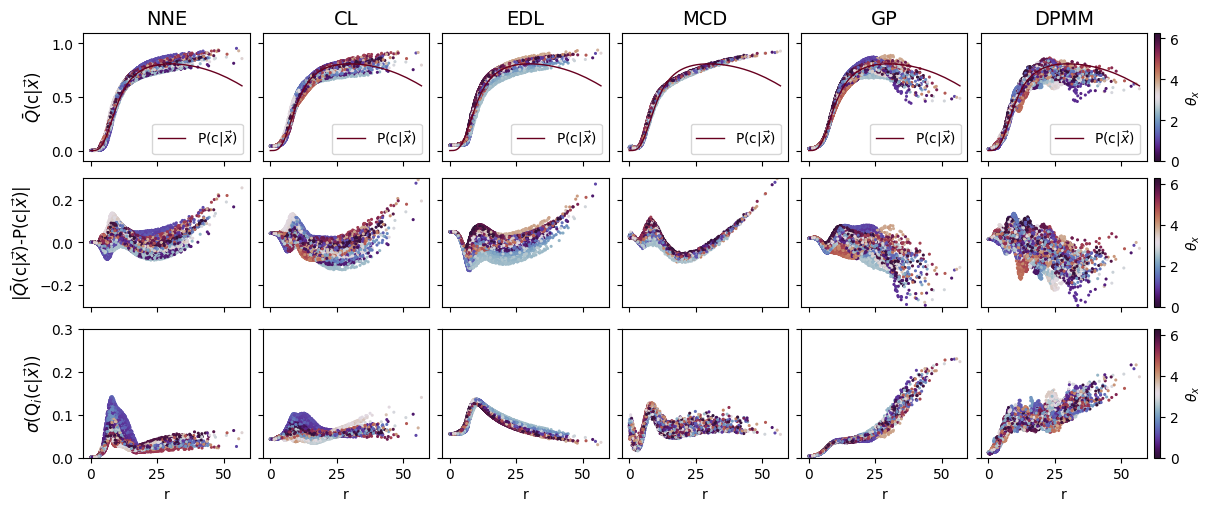

In [16]:
r_plots(test_dfs_A, test_data_A, grid_rmax_A, color_palette="twilight_shifted", dataset_name="datasetA")

In [19]:
r_plots(grid_dfs_B, grid_data_B, grid_rmax_B, color_palette="twilight_shifted", dataset_name="datasetB")

In [ ]:
def metric_plot(dfs_1, dfs_2, best_1, best_2, filename:str):
    #Also uses global variables
    metric_keys = ["ACC", "ROCAUC", "LogLoss", "Mean KL-div test", "ECE", "WD test", "Avg UE"]
    metric_labels = ["ACC", "ROCAUC", "LogLoss", "KL-div", "ECE", "WD", "UE"]
    fig, axs = plt.subplots(nrows = 7, ncols = n_models, figsize = (2*n_models,11), layout="constrained", sharex=True, sharey="row")
    for i in range(n_models):
        axs[0][i].set_title(model_names[i], fontsize=14)
        for j in range(len(metric_keys)):
            axs[j][i].plot(dfs_1[i]["N data"], dfs_1[i][f"{metric_keys[j]}"], c="#ff7f00", label="A") #orange
            axs[j][i].plot(dfs_2[i]["N data"], dfs_2[i][f"{metric_keys[j]}"], c="#377eb8", label="B") #blue
            #axs[0][i].set_ylim(0.6, 0.8)
            
    for col in axs[-1]:
        col.set_xlabel(r"N$_{\text{train}}$")

    for ax in axs.flatten():
        ax.set_xscale("log")
    
    axs[0][0].legend(loc="lower right")

    for j in range(len(metric_keys)):
        key = metric_keys[j]
        axs[j][0].set_ylabel(f"{metric_labels[j]}", fontsize=14)
        #Mark best model
        if (j < (len(metric_keys)-1)):
            for n in range(n_plots):
                best_model_1 = best_1[metric_keys[j]][n]
                axs[j, best_model_1].scatter(x=[n_train[n]], y=[dfs_1[best_model_1][key][n]], marker='*', s=15, c="red")
                best_model_2 = best_2[metric_keys[j]][n]
                axs[j, best_model_2].scatter(x=[n_train[n]], y=[dfs_2[best_model_2][key][n]], marker='o', s=15, c="red")

    fig.savefig(f"fig/{filename}.pdf", format="pdf", bbox_inches='tight', dpi=350)

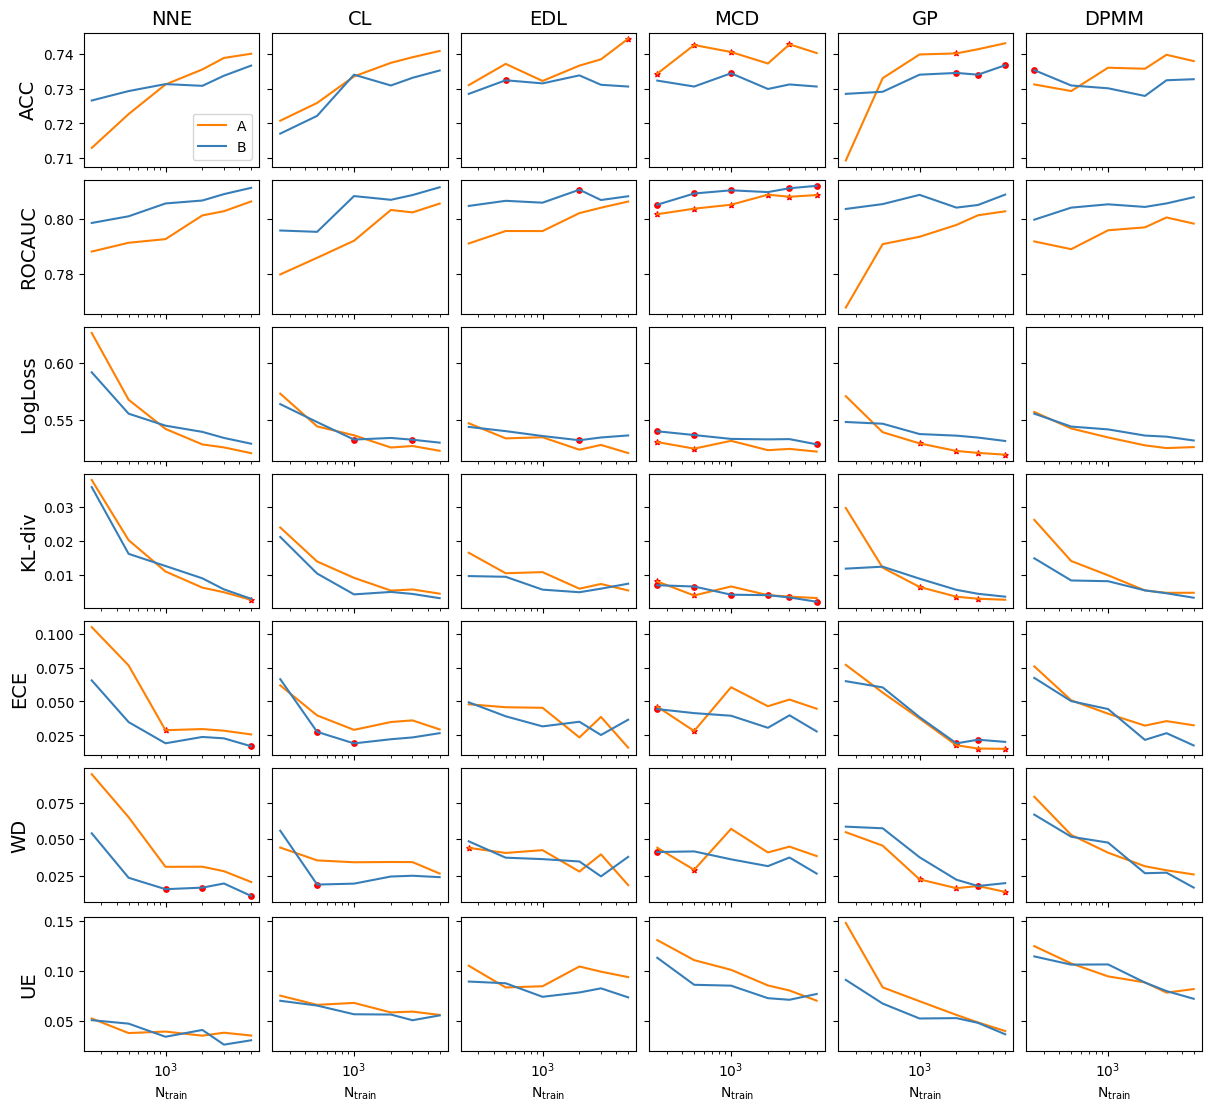

In [ ]:
metric_plot(scores_A, scores_B, best_score_A, best_score_B, "results_datasetAB_metrics")

### Smaller test set

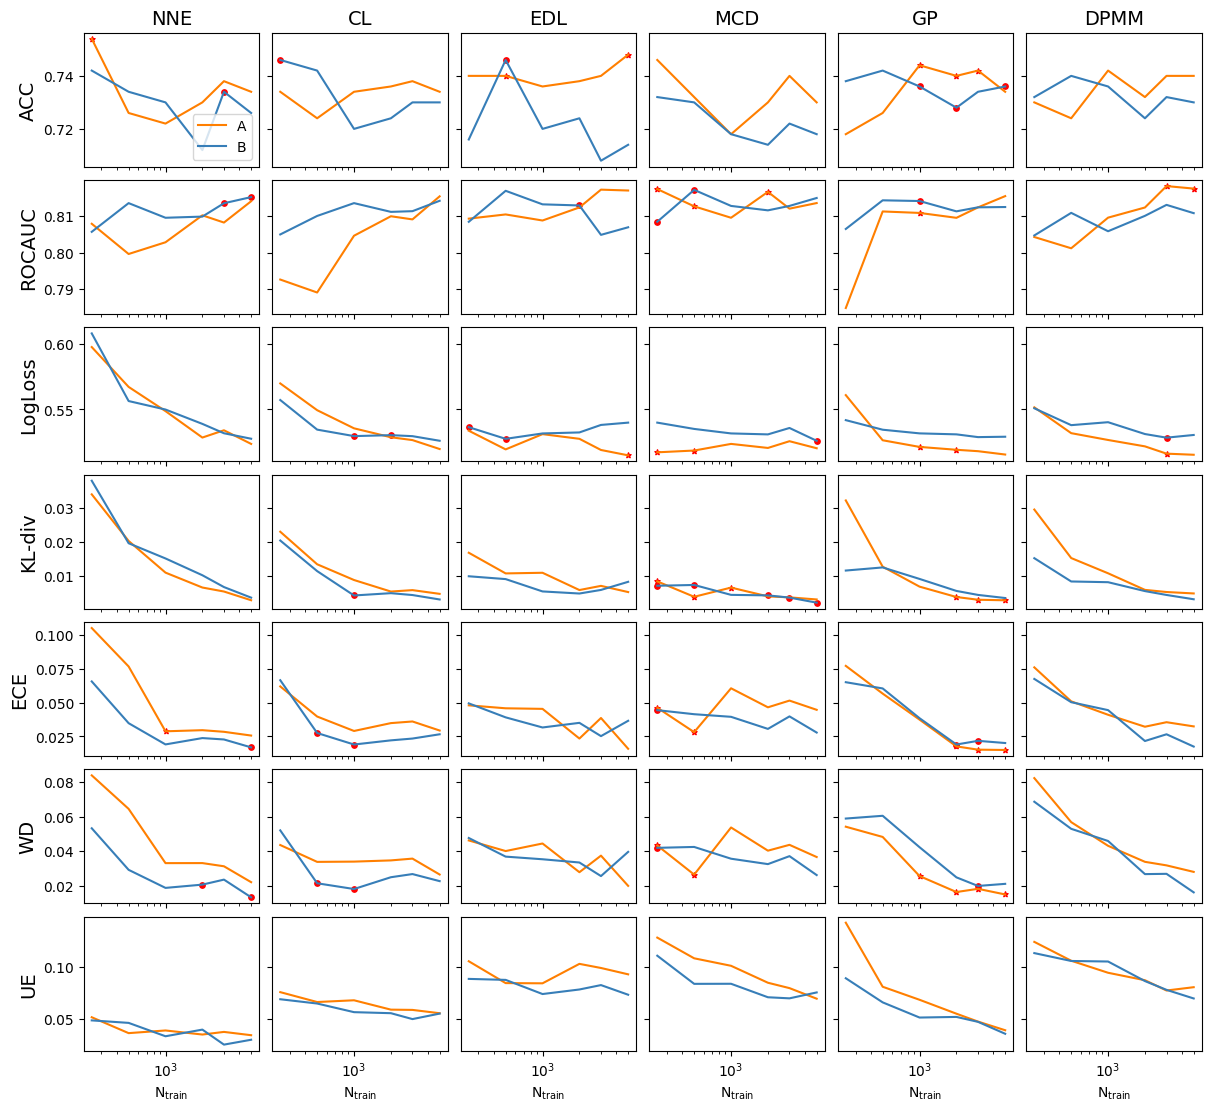

In [ ]:
metric_plot(scores_A_small, scores_B_small, best_score_A_small, best_score_B_small, "results_datasetAB_small_metrics")